In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

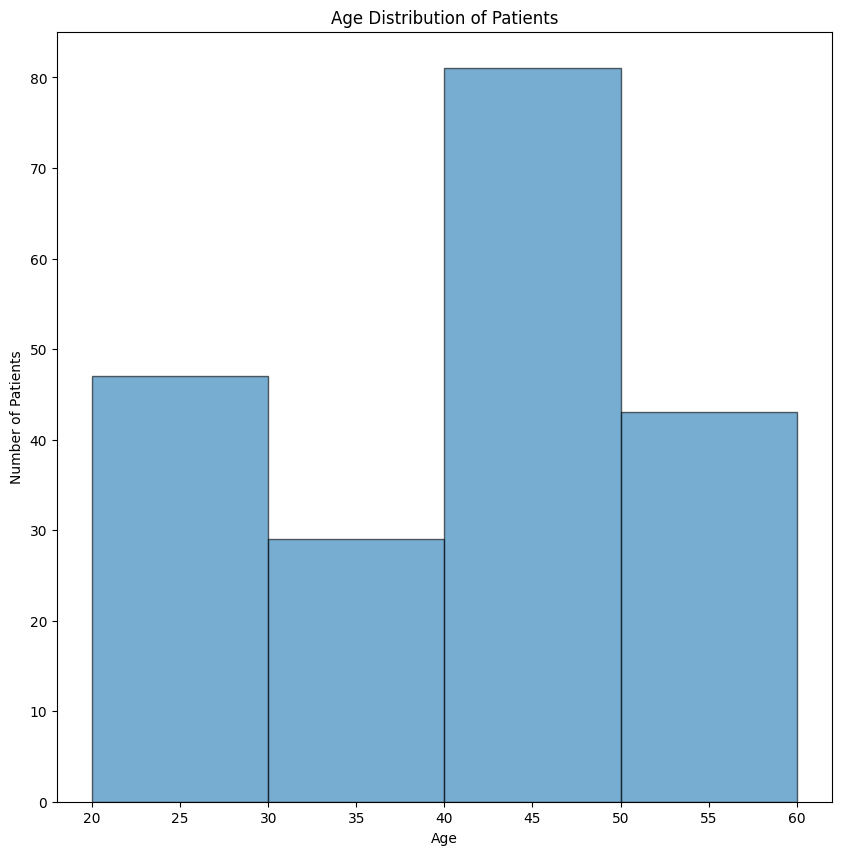

In [12]:
# ---
# Group No. 12
# 1. ภูผา ยอดคีรี 6210450270
# 2. ณัฐนันท์ อุ่นเเจ่ม 6410450010
# 3. สุรเดช เพชรพิเศษศรี 6410450621
# 4. เขมรัตน์ บุณยชาต 6410450362
# ---

group = 12 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 2 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path, delimiter="\s+") # data ที่อาจารย์ให้มามีแค่ index เดียวเลยต้องปรับ delimiter ใหม่เพื่อให้อ่านแต่ละ column ได้

# --- เริ่มเขียนโค้ดตรงนี้ ---

data['Age'].fillna(45, inplace=True) # เปลี่ยน NaN ให้เป็น 45 (ตามตัวอย่างที่อาจารย์ให้มา)

plt.figure(figsize=(10, 10)) # ปรับขนาดกราฟ
plt.hist(data['Age'],bins=4, range=(20,60), edgecolor='black', alpha=0.6) # พล็อด histogram
plt.title('Age Distribution of Patients') # ชื่อกราฟ
plt.xlabel('Age') # ชื่อแกน x
plt.ylabel('Number of Patients') # ชื่อแกน y

data['Age Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60], labels=['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]']) # จัดหมวดหมู่ช่วงอายุ (ตามแบบในตัวอย่าง)
new_data = data['Age Group'].value_counts().reset_index() # นับจำนวณผูป่วย
new_data.columns = ['Age Group', 'Number of Patients'] # เปลี่ยนชื่อ column
data = new_data # อัพเดต data ด้วย new_data เพื่อให้เซฟลงไฟล์ได้

### จากในข้อมูลตัวอย่างของอจารย์ p2_output_5 กับ p2_plot_5 ไม่ตรงกัน

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()